In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\sharm\Desktop\ML\DCT_withoutduplicate 5.csv")

# displaying top 5 rows from the dataset
print(df.head())

# A1: Train a Linear Regression Model
# Assuming the first column is the target and others are features
X = df.iloc[:, 1:].values  # Features
y = df.iloc[:, 0].values  # Target

print(X)
print("\n")
print(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
reg = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

             0           1           2            3           4            5  \
0  38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1  29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2  29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3  29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4  29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   

            6           7          8           9  ...         187         188  \
0 -454.999177 -201.722600 -42.369585 -277.176688  ...  225.163042  375.848590   
1  144.818556   38.937042  56.479929   79.150981  ... -110.815428 -112.520155   
2  145.774409   42.363949  56.631487   84.338212  ... -111.628888 -113.504989   
3   49.023922   24.901637  47.767988   42.011626  ...   -5.242054  -79.615224   
4   49.680814   22.071049  48.720409   37.361647  ...   -5.661566  -82.903805   

          189         190       

In [9]:
# A2: Calculate Metrics for the Regression Model
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Metrics for training set
mse_train, rmse_train, mape_train, r2_train = regression_metrics(y_train, y_train_pred)
print(f'Training Metrics: MSE={mse_train}, RMSE={rmse_train}, MAPE={mape_train}, R2={r2_train}')

# Metrics for test set
mse_test, rmse_test, mape_test, r2_test = regression_metrics(y_test, y_test_pred)
print(f'Test Metrics: MSE={mse_test}, RMSE={rmse_test}, MAPE={mape_test}, R2={r2_test}')

Training Metrics: MSE=1702333.9967695435, RMSE=1304.7352209431397, MAPE=6.979795409065836e+16, R2=0.9011004697500078
Test Metrics: MSE=22545035.076310534, RMSE=4748.16123107783, MAPE=1.115197116967953e+18, R2=0.22616819689154655


In [13]:
# A3: Train Linear Regression Model Using All Features

# Use all columns except the target column for features
# Assuming the first column is still the target
X_all = df.iloc[:, 1:].values  # All features (columns except the first)
y_all = df.iloc[:, 0].values  # Target (first column)

# Display the feature set and target for verification
print("\nFeatures (X) with all attributes:\n", X_all[:5])  # Display first 5 rows of all features
print("\nTarget (y):\n", y_all[:5])  # Display first 5 rows of the target

# Split the data into training and test sets with all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model with all features
reg_all = LinearRegression().fit(X_train_all, y_train_all)

# Predictions for training and test data using the model trained on all features
y_train_pred_all = reg_all.predict(X_train_all)
y_test_pred_all = reg_all.predict(X_test_all)

# Calculate Metrics for the Regression Model Trained with All Features
mse_train_all, rmse_train_all, mape_train_all, r2_train_all = regression_metrics(y_train_all, y_train_pred_all)
print(f'\nTraining Metrics with All Features:\n MSE: {mse_train_all:.4f}, RMSE: {rmse_train_all:.4f}, MAPE: {mape_train_all:.4f}, R2: {r2_train_all:.4f}')

mse_test_all, rmse_test_all, mape_test_all, r2_test_all = regression_metrics(y_test_all, y_test_pred_all)
print(f'Test Metrics with All Features:\n MSE: {mse_test_all:.4f}, RMSE: {rmse_test_all:.4f}, MAPE: {mape_test_all:.4f}, R2: {r2_test_all:.4f}')



Features (X) with all attributes:
 [[ 1.92737565e+02  1.88366005e+02  2.34828524e+03  1.88609889e+02
   3.35977767e+03 -4.54999177e+02 -2.01722600e+02 -4.23695848e+01
  -2.77176688e+02  2.17248142e+02 -2.89740868e+02 -2.75226602e+03
  -3.93313452e+02 -1.64336370e+03  4.33444745e+02  3.61000223e+01
   8.84776220e+01  2.38470539e+02 -1.46521830e+02 -3.24941640e+01
  -5.43521875e+02  9.16096231e+01 -2.03490595e+02  5.86457830e+02
   1.41863776e+03  2.58310563e+02  3.34791639e+01 -1.59370017e+02
   1.51315347e+02 -3.58867034e+01  1.07613336e+02  3.94414040e+02
   1.25237839e+02 -1.06647636e+02  2.63452863e+02  4.42197002e+01
  -6.01971374e+01  6.55947233e+02 -1.55998835e+02 -1.41357629e+01
  -3.27010284e+02 -1.43481546e+02  3.68401043e+01  6.47292299e+02
  -1.79168061e+02 -2.59469342e+02 -1.21328783e+02 -3.93079142e+02
  -5.33793849e+02 -2.39265082e+02  1.53151314e+02 -2.33795627e+02
   2.41334410e+02 -1.35081804e+02 -3.72855613e+02  1.56581737e+02
  -1.69170300e+02  1.20074067e+02 -4.040

In [15]:
from sklearn.cluster import KMeans

# A4: Perform K-Means Clustering

# Use all feature columns for clustering (exclude the target variable)
# Assuming the first column is still the target, so we exclude it
X_clustering = df.iloc[:, 1:].values  # All columns except the target column

# Display the data to be clustered
print("\nData for Clustering (First 5 rows):\n", X_clustering[:5])  # Display first 5 rows

# Initialize the K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")

# Fit the K-Means model to the data
kmeans.fit(X_clustering)

# Retrieve the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Retrieve the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Display the cluster labels for the first 5 data points
print("\nCluster Labels (First 5 data points):\n", cluster_labels[:5])

# Display the cluster centers
print("\nCluster Centers:\n", cluster_centers)



Data for Clustering (First 5 rows):
 [[ 1.92737565e+02  1.88366005e+02  2.34828524e+03  1.88609889e+02
   3.35977767e+03 -4.54999177e+02 -2.01722600e+02 -4.23695848e+01
  -2.77176688e+02  2.17248142e+02 -2.89740868e+02 -2.75226602e+03
  -3.93313452e+02 -1.64336370e+03  4.33444745e+02  3.61000223e+01
   8.84776220e+01  2.38470539e+02 -1.46521830e+02 -3.24941640e+01
  -5.43521875e+02  9.16096231e+01 -2.03490595e+02  5.86457830e+02
   1.41863776e+03  2.58310563e+02  3.34791639e+01 -1.59370017e+02
   1.51315347e+02 -3.58867034e+01  1.07613336e+02  3.94414040e+02
   1.25237839e+02 -1.06647636e+02  2.63452863e+02  4.42197002e+01
  -6.01971374e+01  6.55947233e+02 -1.55998835e+02 -1.41357629e+01
  -3.27010284e+02 -1.43481546e+02  3.68401043e+01  6.47292299e+02
  -1.79168061e+02 -2.59469342e+02 -1.21328783e+02 -3.93079142e+02
  -5.33793849e+02 -2.39265082e+02  1.53151314e+02 -2.33795627e+02
   2.41334410e+02 -1.35081804e+02 -3.72855613e+02  1.56581737e+02
  -1.69170300e+02  1.20074067e+02 -4.0

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Reuse the data prepared for clustering (excluding the target variable)
X_clustering = df.iloc[:, 1:].values  # All columns except the target column

# Fit the K-Means model with 2 clusters (as done in A4)
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_clustering)

# Obtain the cluster labels after fitting
labels = kmeans.labels_

# (i) Calculate the Silhouette Score
# Silhouette Score ranges from -1 to 1; higher values indicate better-defined clusters
sil_score = silhouette_score(X_clustering, labels)
print(f'Silhouette Score: {sil_score:.4f}')

# (ii) Calculate the Calinski-Harabasz Score
# Higher values indicate better-defined clusters (ratio of between-clusters dispersion to within-cluster dispersion)
ch_score = calinski_harabasz_score(X_clustering, labels)
print(f'Calinski-Harabasz Score (CH Score): {ch_score:.4f}')

# (iii) Calculate the Davies-Bouldin Score
# Lower values indicate better clustering (average similarity between clusters)
db_score = davies_bouldin_score(X_clustering, labels)
print(f'Davies-Bouldin Index (DB Index): {db_score:.4f}')


Silhouette Score: 0.1635
Calinski-Harabasz Score (CH Score): 204.9510
Davies-Bouldin Index (DB Index): 3.0216


k = 2: Silhouette Score = 0.1635, CH Score = 204.9510, DB Index = 3.0216
k = 3: Silhouette Score = 0.1452, CH Score = 214.3215, DB Index = 2.6820
k = 4: Silhouette Score = 0.1244, CH Score = 177.4997, DB Index = 3.0543
k = 5: Silhouette Score = 0.0451, CH Score = 158.1197, DB Index = 2.7627
k = 6: Silhouette Score = 0.0523, CH Score = 143.9688, DB Index = 2.8196
k = 7: Silhouette Score = 0.0603, CH Score = 134.3191, DB Index = 2.7106
k = 8: Silhouette Score = 0.0636, CH Score = 126.0542, DB Index = 2.6602
k = 9: Silhouette Score = 0.0681, CH Score = 115.9855, DB Index = 2.5278
k = 10: Silhouette Score = 0.0440, CH Score = 106.6267, DB Index = 2.5543


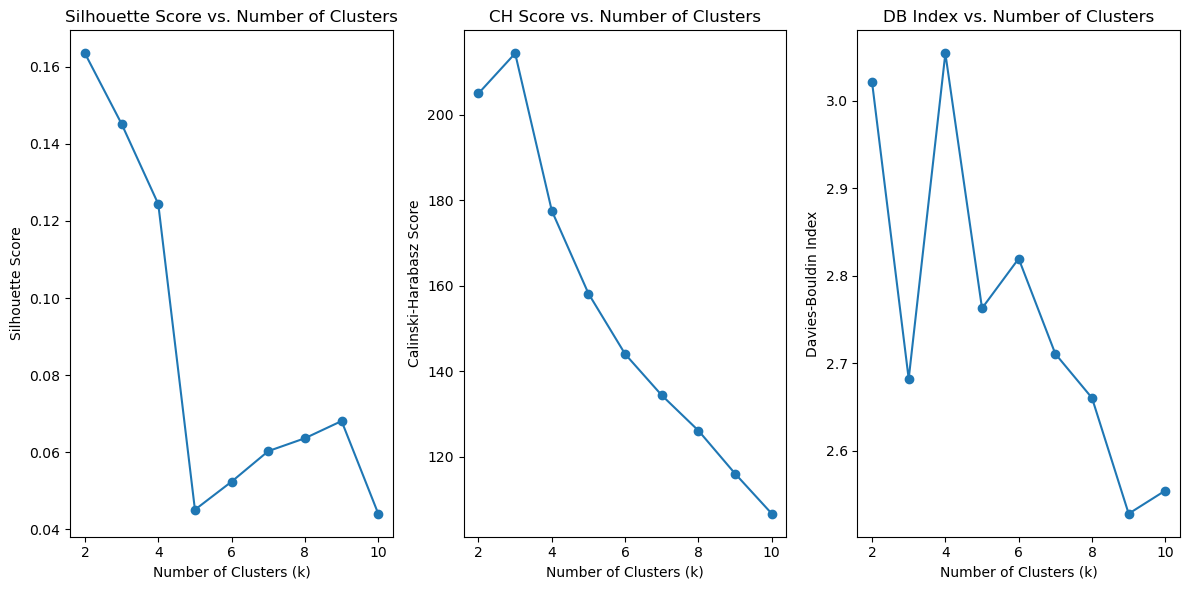

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Prepare the data for clustering by excluding the target variable
# Assuming the target is in the first column, so all other columns are features
X_clustering = df.iloc[:, 1:].values  # All columns except the target column

# Define a range of k values to test
k_values = range(2, 11)  # Testing k from 2 to 10

# Initialize lists to store the scores for each k value
silhouette_scores = []
ch_scores = []
db_scores = []

# Perform K-means clustering for each k value and compute the evaluation scores
for k in k_values:
    # Initialize the KMeans model with the current number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    
    # Fit the model to the data
    kmeans.fit(X_clustering)
    
    # Obtain the cluster labels after fitting
    labels = kmeans.labels_
    
    # Calculate and store the Silhouette Score
    sil_score = silhouette_score(X_clustering, labels)
    silhouette_scores.append(sil_score)
    
    # Calculate and store the Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(X_clustering, labels)
    ch_scores.append(ch_score)
    
    # Calculate and store the Davies-Bouldin Score
    db_score = davies_bouldin_score(X_clustering, labels)
    db_scores.append(db_score)
    
    # Print the scores for the current k
    print(f'k = {k}: Silhouette Score = {sil_score:.4f}, CH Score = {ch_score:.4f}, DB Index = {db_score:.4f}')

# Plotting the scores against k values to visualize the optimal cluster count

# Plot Silhouette Score
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

# Plot Calinski-Harabasz Score
plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('CH Score vs. Number of Clusters')

# Plot Davies-Bouldin Score
plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('DB Index vs. Number of Clusters')

plt.tight_layout()
plt.show()


k = 2: Inertia = 37845218640.7295
k = 3: Inertia = 34679951667.2129
k = 4: Inertia = 33381287734.6725
k = 5: Inertia = 32218683421.1425
k = 6: Inertia = 31265912277.0160
k = 7: Inertia = 30379987551.1662
k = 8: Inertia = 29632989959.9234
k = 9: Inertia = 29203780240.8766
k = 10: Inertia = 28910157021.9543
k = 11: Inertia = 28604617562.1252
k = 12: Inertia = 28117088773.9129
k = 13: Inertia = 27552053583.9504
k = 14: Inertia = 27669231039.4187
k = 15: Inertia = 26694713431.0656
k = 16: Inertia = 26405699578.8451
k = 17: Inertia = 25881996303.2450
k = 18: Inertia = 25943456002.2249
k = 19: Inertia = 25707871689.7884


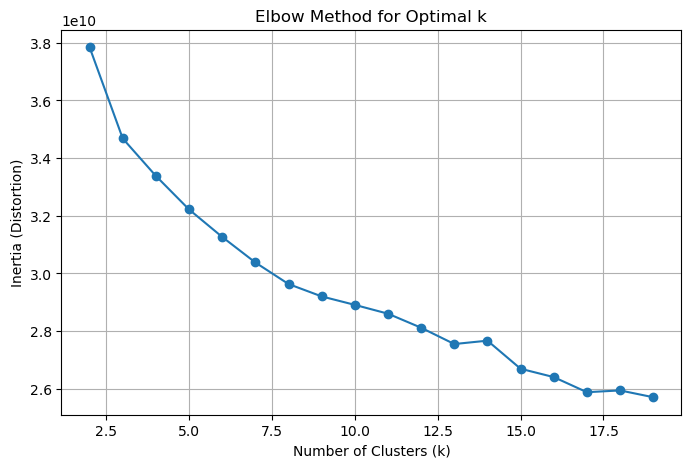

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare the data for clustering by excluding the target variable
# Assuming the target is in the first column, so all other columns are features
X_clustering = df.iloc[:, 1:].values  # All columns except the target column

# Initialize an empty list to store distortion (inertia) values for each k
distortions = []

# Define a range of k values to test (from 2 to 19)
k_values = range(2, 20)

# Perform K-means clustering for each k value and compute the distortion (inertia)
for k in k_values:
    # Initialize the KMeans model with the current number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    
    # Fit the model to the data
    kmeans.fit(X_clustering)
    
    # Append the inertia (within-cluster sum of squares) to the distortions list
    distortions.append(kmeans.inertia_)
    
    # Print the inertia value for the current k
    print(f'k = {k}: Inertia = {kmeans.inertia_:.4f}')

# Plot the Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
